In [1]:
# the rest of the imports require the location to be the base of the repo 
#   i.e., SARS-CoV-2-network-analysis)
# run this first if needed to get to the right directory
import os
os.chdir('../../')
# os.chdir('/data/jeff-law/projects/2020-03-covid-19/SARS-CoV-2-network-analysis')
os.getcwd()

'/data/jeff-law/projects/2020-03-covid-19/SARS-CoV-2-network-analysis'

In [2]:
from collections import defaultdict
import argparse
import os, sys
from tqdm import tqdm
import itertools
#import utils.file_utils as utils
# also compute the significance of sinksource vs local
#from scipy.stats import kruskal, mannwhitneyu
# plotting imports
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
print("python version: %s" % (sys.version.split('\n')[0]))
print("matplotlib version: %s" % matplotlib.__version__)
print("seaborn version: %s" % sns.__version__)
print("pandas version: %s" % pd.__version__)
print("numpy version: %s" % (np.__version__))
# make this the default for now
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.2)
# my local imports
# fss_dir = os.path.dirname(os.path.dirname(os.path.dirname(__file__)))
# sys.path.insert(0,fss_dir)
from src.FastSinkSource.src.plot import plot_utils
from src.FastSinkSource.src.algorithms import runner
from src.FastSinkSource.src.evaluate import cross_validation as cv


%matplotlib inline  

python version: 3.7.7 (default, Mar 13 2020, 13:32:22) 
matplotlib version: 3.2.1
seaborn version: 0.10.0
pandas version: 1.0.3
numpy version: 1.18.2


# CV Plots

Here is some code to generate the CV plots

In [70]:
config_file = "fss_inputs/config_files/stringv11-wace2/string-combined-and-deepnf.yaml"
# out_file = "outputs/viz/params-testing/string-tissuenet-ace2-cv5-nf5-nr100.pdf"
# neg_factor = 1
# neg_factor = 5
neg_factor = 10
postfix = "-eprec"
out_file = "outputs/viz/stringv11/400/2020-03-sarscov2-human-ppi-ace2/auroc-auprc-epr-box-nf%s.pdf" % (neg_factor)
os.makedirs(os.path.dirname(out_file), exist_ok=True)
# algs = ['genemaniaplus', 'genemania', 'sinksourceplus', 'sinksource', 'svm', 'logistic_regression', 'localplus']
algs = ['genemaniaplus', 'genemania', 'sinksourceplus', 'deepnf', 'svm', 'logistic_regression', 'localplus']
measures = ['auroc', 'auprc', 'eprec-rec0.3']
# algs = ['genemaniaplus', 'genemania']
df_all = pd.DataFrame()
print(config_file)
config_map = plot_utils.load_config_file(config_file)
# for neg_factor in [5, 10]:
for alg in algs:
    kwargs = {'algs': [alg], 'measures': measures, #'ratio_over_random': True,
              'cross_validation_folds': 5, 'sample_neg_examples_factor': neg_factor}
    input_settings, alg_settings, output_settings, out_pref, kwargs = plot_utils.setup_variables(
            config_map, '', **kwargs)
    print(kwargs)
    kwargs['postfix'] = postfix

    df = plot_utils.load_all_results(input_settings, alg_settings, output_settings, **kwargs)
#     df.rename(columns={'Algorithm': 'param_val'}, inplace=True)
    df['neg_factor'] = neg_factor
    df_all = pd.concat([df_all, df])

if kwargs.get('ratio_over_random'):
    kwargs['measures'] = [m+'-ratio' for m in kwargs['measures']]
plot_utils.results_overview(df_all, measures=kwargs['measures'])
df_all.head()

# rename the measures
df_all['plot_exp_name'] = df_all['plot_exp_name'].replace("STRING-400", 'STRING')
df_all.drop(columns=['avgp', 'fmax', 'eprec-reck1'], inplace=True)

df2 = df_all.melt(id_vars=['Algorithm', 'plot_exp_name', 'neg_factor'], value_vars=kwargs['measures'], var_name='measure')
df2['measure'] = df2['measure'].replace("fmax-ratio", r"F$_{\mathrm{max}}$") \
                               .replace('eprec-rec0.3-ratio', "Early Precision (0.3 Recall)") \
                               .replace('eprec-rec0.3', "Early Precision (0.3 Recall)") \
                               .replace('auprc-ratio', "AUPRC") \
                               .replace('auprc', "AUPRC") \
                               .replace('auroc', 'AUROC')
measures = ['AUROC', 'AUPRC', 'Early Precision (0.3 Recall)']
# hue_order = ['']

# now combine the name and measure column
df2['exp_name'] = df2['measure'] + ' P:N 1:' + df2['neg_factor'].astype(str)
# df2.sort_values('exp_name', inplace=True)
df2.head()

fss_inputs/config_files/stringv11-wace2/string-combined-and-deepnf.yaml
{'algs': ['genemaniaplus'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 10, 'num_pred_to_write': -1, 'num_reps': 100, 'postfix': ''}
	not found outputs//networks/stringv11/400/2020-03-sarscov2-human-ppi-ace2-all/genemaniaplus/cv-5folds-rep100-nf10-gmw-a0_01-tol1e-05-eprec.txt - skipping
{'algs': ['genemania'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 10, 'num_pred_to_write': -1, 'num_reps': 100, 'postfix': ''}
	not found outputs//networks/stringv11/400/2020-03-sarscov2-human-ppi-ace2-all/genemania/cv-5folds-rep100-nf10-gmw-a0_1-tol1e-05-eprec.txt - skipping
{'algs': ['sinksourceplus'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 10, 'num_pred_to_write': -1, 'num_reps': 100, 'postfix': ''}
	not found outputs//networks/stringv11

,Algorithm,plot_exp_name,neg_factor,measure,value,exp_name
0,RL,STRING,10,AUROC,0.7589,AUROC P:N 1:10
1,RL,STRING,10,AUROC,0.7696,AUROC P:N 1:10
2,RL,STRING,10,AUROC,0.7593,AUROC P:N 1:10
3,RL,STRING,10,AUROC,0.7597,AUROC P:N 1:10
4,RL,STRING,10,AUROC,0.7532,AUROC P:N 1:10


### First plot the neg_factor=1 that goes in the main paper


  Algorithm plot_exp_name  neg_factor measure   value       exp_name
0        RL        STRING           1   AUROC  0.7724  AUROC P:N 1:1
1        RL        STRING           1   AUROC  0.7855  AUROC P:N 1:1
2        RL        STRING           1   AUROC  0.7588  AUROC P:N 1:1
3        RL        STRING           1   AUROC  0.7507  AUROC P:N 1:1
4        RL        STRING           1   AUROC  0.7417  AUROC P:N 1:1
    Algorithm plot_exp_name  neg_factor measure   value       exp_name
700        RL        STRING           1   AUPRC  0.7478  AUPRC P:N 1:1
701        RL        STRING           1   AUPRC  0.7688  AUPRC P:N 1:1
702        RL        STRING           1   AUPRC  0.7531  AUPRC P:N 1:1
703        RL        STRING           1   AUPRC  0.7417  AUPRC P:N 1:1
704        RL        STRING           1   AUPRC  0.7347  AUPRC P:N 1:1
     Algorithm plot_exp_name  neg_factor                       measure  \
1400        RL        STRING           1  Early Precision (0.3 Recall)   
1401        

/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

outputs/viz/stringv11/400/2020-03-sarscov2-human-ppi-ace2/auroc-auprc-epr-box-nf1.pdf


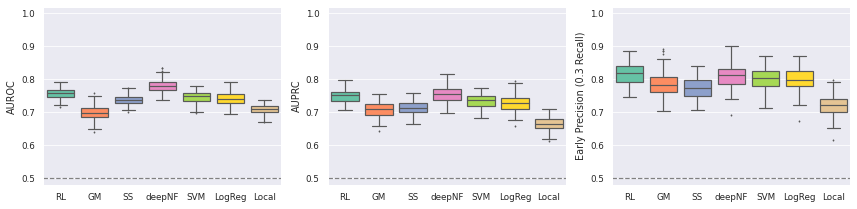

In [67]:
sns.set_context('paper', font_scale=1.0)
f, axes = plt.subplots(ncols=len(df2['measure'].unique()), figsize=(12,3))
# for i, (ax, (measure, curr_df)) in enumerate(zip(axes, df2.groupby('measure'))):
for i, (ax, measure) in enumerate(zip(axes, measures)):
    curr_df = df2[df2['measure'] == measure]
    print(curr_df.head())
    curr_df['P:N Ratio'] = "1:" + curr_df['neg_factor'].astype(str)
#     print(curr_df[(curr_df['Algorithm'] == 'GM+') & (curr_df['neg_factor'] == 1)].median())
#     print(triple_colors[i*3:(i+1)*3])
    ax = sns.boxplot(x='Algorithm', y='value', data=curr_df, saturation=1.0,
#                     hue='P:N Ratio', 
                     fliersize=1, ax=ax, palette="Set2")#palette=triple_colors[i*3:(i+1)*3], ax=ax)
#     ax = sns.barplot(x='Algorithm', y='value', data=curr_df, saturation=1,
#                 hue='neg_factor', ax=ax, palette="Set2")#palette=triple_colors[i*3:(i+1)*3], ax=ax)
    
#     ax.set_title(measure)
    ax.set_ylabel(measure)
#     if i != 0:
# #         ax.set_ylabel("Ratio over Random Predictor", fontsize=12)
# #     else:
# #         ax.set_ylabel("")
#         ax.get_legend().remove()
        
    ax.set_ylim(0.48,1.02)
    ax.set_xlabel("")
    if measure != "AUROC":
        rand_pred = 1 / float(1 + neg_factor)
    else:
        rand_pred = 0.5
    ax.axhline(rand_pred, color="gray", linestyle="--")

plt.tight_layout()
print(out_file)
plt.savefig(out_file)
plt.savefig(out_file.replace('.pdf','.svg'))

### Now plot the other neg_factors that goes in the supplement
For the paper, I plotted the 1:5 and 1:10 ratios separately, and then combined the svgs in inkscape

AUROC
AUPRC
Early Precision (0.3 Recall)
outputs/viz/stringv11/400/2020-03-sarscov2-human-ppi-ace2/auroc-auprc-epr-box-nf10.pdf


/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

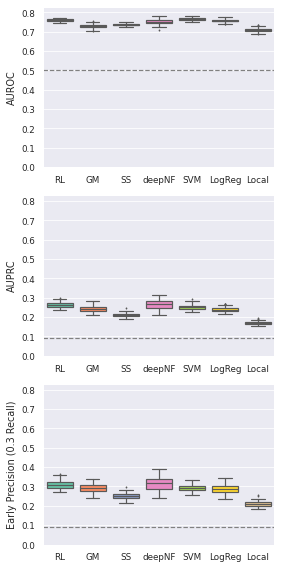

In [71]:
sns.set_context('paper', font_scale=1.0)
f, axes = plt.subplots(nrows=len(df2['measure'].unique()), sharey=True, figsize=(4,8))
# for i, (ax, (measure, curr_df)) in enumerate(zip(axes, df2.groupby('measure'))):
for i, (ax, measure) in enumerate(zip(axes, measures)):    
    print(measure)
    curr_df = df2[df2['measure'] == measure]
#     print(curr_df.head())
    curr_df['P:N Ratio'] = "1:" + curr_df['neg_factor'].astype(str)
    ax = sns.boxplot(x='Algorithm', y='value', data=curr_df, saturation=1.0,
#                     hue='P:N Ratio', 
                     fliersize=1, ax=ax, palette="Set2")

    ax.set_ylabel(measure)
        
    ax.set_ylim(0,0.83)
    ax.set_xlabel("")
    if measure != "AUROC":
        rand_pred = 1 / float(1 + neg_factor)
    else:
        rand_pred = 0.5
    ax.axhline(rand_pred, color="gray", linestyle="--")

plt.tight_layout()
print(out_file)
plt.savefig(out_file)
plt.savefig(out_file.replace('.pdf','.svg'))

In [21]:
# also write the medians to a file(?)
df_med = df_all.groupby("Algorithm").median()
df_med = df_med.drop(columns=['# ann', 'repetition'])
df_med

,auprc,auroc,eprec-rec0.1,neg_factor
Algorithm,,,,
GM,0.24475,0.72830,0.44590,10.0
Local,0.17025,0.70960,0.18590,10.0
LogReg,0.24130,0.75705,0.38595,10.0
RL,0.26315,0.75890,0.45830,10.0
SS,0.20945,0.73635,0.28450,10.0
SVM,0.25090,0.76610,0.40740,10.0
